In [ ]:
# "Sanaz Hosseini"- University of North Carolina at Charlotte
# Introduction to Machine Learning Class - Instructor: Prof. Hamed Tabkhi
# Support Vector Machine, Support Vector Regression, & Kernelization
# Homework 4

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [118]:
breast = load_breast_cancer()

In [119]:
breast_data = breast.data
breast_data.shape

(569, 30)

In [120]:
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [121]:
breast_labels = breast.target
breast_labels.shape

(569,)

In [122]:
labels = np.reshape(breast_labels,(569,1))

In [123]:
final_breast_data = np.concatenate([breast_data,labels], axis=1)
final_breast_data.shape

(569, 31)

In [124]:
breast_dataset = pd.DataFrame(final_breast_data)

In [125]:
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [126]:
features_labels = np.append(features, 'label')

In [127]:
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [128]:
breast_dataset['label'].replace(0, 'Benign', inplace = True)
breast_dataset['label'].replace(1, 'Malignant', inplace = True)
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [129]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


In [130]:
X = breast_dataset.iloc[:, 0:30].values
Y = breast_dataset.iloc[:, 30].values

In [131]:
X.shape

(569, 30)

In [132]:
Y.shape

(569,)

In [133]:
print (range(25))

range(0, 25)


In [134]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Support Vector Machine, using "linear" kernel and PCA:

In [135]:
# Creating a "for" loop to see all the results of changing the number of components and scores, together; 

Accuracy = np.zeros(31)
Precision = np.zeros(31)
Recall = np.zeros(31)

for k in range(1,31): 
    
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y, test_size = 0.2, random_state = 0)
    
    
    model = SVC(kernel='linear')
    model.fit(X_train, Y_train)

    Y_fit = model.predict(X_test)
    
        
    Accuracy[k] = metrics.accuracy_score(Y_test, Y_fit)
    Precision[k] = metrics.precision_score(Y_test, Y_fit, pos_label="Benign")
    Recall[k] = metrics.recall_score(Y_test, Y_fit, pos_label="Benign")
    
    print (f"n_component = {k}")
    print('Training accuracy:', model.score(X_train, Y_train))
    print(classification_report(Y_test, Y_fit))
    print("\n")

n_component = 1
Training accuracy: 0.9208791208791208
              precision    recall  f1-score   support

      Benign       0.88      0.89      0.88        47
   Malignant       0.92      0.91      0.92        67

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



n_component = 2
Training accuracy: 0.9626373626373627
              precision    recall  f1-score   support

      Benign       0.88      0.94      0.91        47
   Malignant       0.95      0.91      0.93        67

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



n_component = 3
Training accuracy: 0.9582417582417583
              precision    recall  f1-score   support

      Benign       0.88      0.91      0.90        47
   Malignant       0.94      0.91      0.92        67

    accuracy    

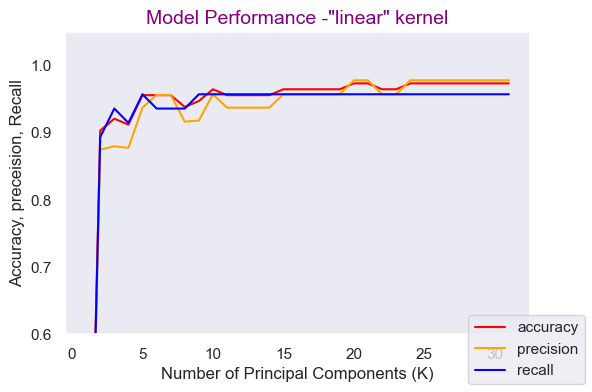

In [136]:
xaxis = range(1,32)
fig = plt.figure(dpi=100)
plt.ylim([0.6, 1.05])
plt.title('Model Performance -"linear" kernel', fontsize = 14, color = 'purple')
plt.xlabel("Number of Principal Components (K)", fontsize = 12)
plt.ylabel("Accuracy, preceision, Recall", fontsize = 12)
plt.plot(xaxis, Accuracy, label="accuracy", color = 'red') 
plt.plot(xaxis, Precision, label="precision", color = 'orange')
plt.plot(xaxis, Recall, label="recall", color = 'blue')
fig.legend(loc = "lower right")
plt.grid()

# Support Vector Machine, using "rbf" kernel and PCA:

In [137]:
# Creating a "for" loop to see all the results of changing the number of components and scores, together; 

Accuracy = np.zeros(31)
Precision = np.zeros(31)
Recall = np.zeros(31)

for k in range(1,31): 
    
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y, test_size = 0.2, random_state = 0)
    
    
    model = SVC(kernel='rbf')
    model.fit(X_train, Y_train)

    Y_fit = model.predict(X_test)
    
        
    Accuracy[k] = metrics.accuracy_score(Y_test, Y_fit)
    Precision[k] = metrics.precision_score(Y_test, Y_fit, pos_label="Benign")
    Recall[k] = metrics.recall_score(Y_test, Y_fit, pos_label="Benign")
    
    print (f"n_component = {k}")
    print('Training accuracy:', model.score(X_train, Y_train))
    print(classification_report(Y_test, Y_fit))
    print("\n")

n_component = 1
Training accuracy: 0.9252747252747253
              precision    recall  f1-score   support

      Benign       0.88      0.89      0.88        47
   Malignant       0.92      0.91      0.92        67

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



n_component = 2
Training accuracy: 0.9538461538461539
              precision    recall  f1-score   support

      Benign       0.86      0.89      0.88        47
   Malignant       0.92      0.90      0.91        67

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.90      0.89      0.90       114



n_component = 3
Training accuracy: 0.9560439560439561
              precision    recall  f1-score   support

      Benign       0.89      0.89      0.89        47
   Malignant       0.93      0.93      0.93        67

    accuracy    

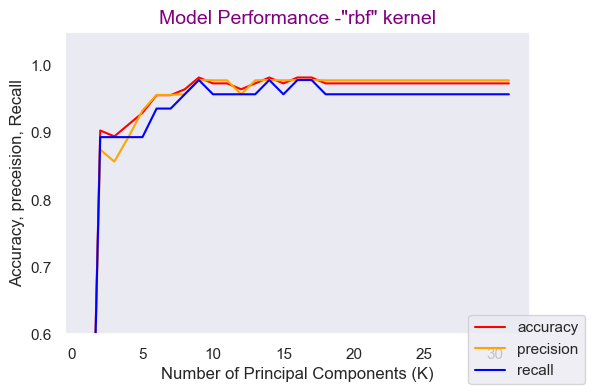

In [138]:
xaxis = range(1,32)
fig = plt.figure(dpi=100)
plt.ylim([0.6, 1.05])
plt.title('Model Performance -"rbf" kernel', fontsize = 14, color = 'purple')
plt.xlabel("Number of Principal Components (K)", fontsize = 12)
plt.ylabel("Accuracy, preceision, Recall", fontsize = 12)
plt.plot(xaxis, Accuracy, label="accuracy", color = 'red') 
plt.plot(xaxis, Precision, label="precision", color = 'orange')
plt.plot(xaxis, Recall, label="recall", color = 'blue')
fig.legend(loc = "lower right")
plt.grid()

# Support Vector Machine, using "poly" kernel and PCA:

In [139]:
# Creating a "for" loop to see all the results of changing the number of components and scores, together; 

Accuracy = np.zeros(31)
Precision = np.zeros(31)
Recall = np.zeros(31)

for k in range(1,31): 
    
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y, test_size = 0.2, random_state = 0)
    
    
    model = SVC(kernel='poly')
    model.fit(X_train, Y_train)

    Y_fit = model.predict(X_test)
    
        
    Accuracy[k] = metrics.accuracy_score(Y_test, Y_fit)
    Precision[k] = metrics.precision_score(Y_test, Y_fit, pos_label="Benign")
    Recall[k] = metrics.recall_score(Y_test, Y_fit, pos_label="Benign")
    
    print (f"n_component = {k}")
    print('Training accuracy:', model.score(X_train, Y_train))
    print(classification_report(Y_test, Y_fit))
    print("\n")

n_component = 1
Training accuracy: 0.8637362637362638
              precision    recall  f1-score   support

      Benign       1.00      0.64      0.78        47
   Malignant       0.80      1.00      0.89        67

    accuracy                           0.85       114
   macro avg       0.90      0.82      0.83       114
weighted avg       0.88      0.85      0.84       114



n_component = 2
Training accuracy: 0.9032967032967033
              precision    recall  f1-score   support

      Benign       0.97      0.77      0.86        47
   Malignant       0.86      0.99      0.92        67

    accuracy                           0.89       114
   macro avg       0.92      0.88      0.89       114
weighted avg       0.90      0.89      0.89       114



n_component = 3
Training accuracy: 0.9142857142857143
              precision    recall  f1-score   support

      Benign       1.00      0.74      0.85        47
   Malignant       0.85      1.00      0.92        67

    accuracy    

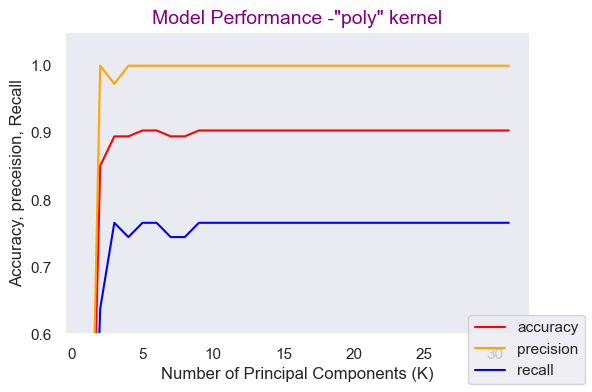

In [140]:
xaxis = range(1,32)
fig = plt.figure(dpi=100)
plt.ylim([0.6, 1.05])
plt.title('Model Performance -"poly" kernel', fontsize = 14, color = 'purple')
plt.xlabel("Number of Principal Components (K)", fontsize = 12)
plt.ylabel("Accuracy, preceision, Recall", fontsize = 12)
plt.plot(xaxis, Accuracy, label="accuracy", color = 'red') 
plt.plot(xaxis, Precision, label="precision", color = 'orange')
plt.plot(xaxis, Recall, label="recall", color = 'blue')
fig.legend(loc = "lower right")
plt.grid()

# Support Vector Machine, using "sigmoid" kernel and PCA:

In [141]:
# Creating a "for" loop to see all the results of changing the number of components and scores, together; 

Accuracy = np.zeros(31)
Precision = np.zeros(31)
Recall = np.zeros(31)

for k in range(1,31): 
    
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y, test_size = 0.2, random_state = 0)
    
    
    model = SVC(kernel='sigmoid')
    model.fit(X_train, Y_train)

    Y_fit = model.predict(X_test)
    
        
    Accuracy[k] = metrics.accuracy_score(Y_test, Y_fit)
    Precision[k] = metrics.precision_score(Y_test, Y_fit, pos_label="Benign")
    Recall[k] = metrics.recall_score(Y_test, Y_fit, pos_label="Benign")
    
    print (f"n_component = {k}")
    print('Training accuracy:', model.score(X_train, Y_train))
    print(classification_report(Y_test, Y_fit))
    print("\n")

n_component = 1
Training accuracy: 0.9054945054945055
              precision    recall  f1-score   support

      Benign       0.80      0.85      0.82        47
   Malignant       0.89      0.85      0.87        67

    accuracy                           0.85       114
   macro avg       0.85      0.85      0.85       114
weighted avg       0.85      0.85      0.85       114



n_component = 2
Training accuracy: 0.9186813186813186
              precision    recall  f1-score   support

      Benign       0.83      0.85      0.84        47
   Malignant       0.89      0.88      0.89        67

    accuracy                           0.87       114
   macro avg       0.86      0.87      0.86       114
weighted avg       0.87      0.87      0.87       114



n_component = 3
Training accuracy: 0.9054945054945055
              precision    recall  f1-score   support

      Benign       0.82      0.87      0.85        47
   Malignant       0.91      0.87      0.89        67

    accuracy    

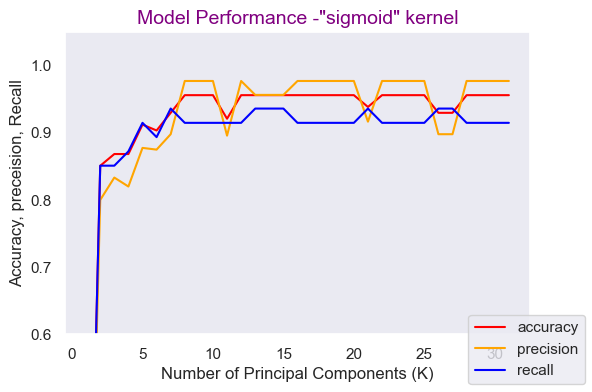

In [142]:
xaxis = range(1,32)
fig = plt.figure(dpi=100)
plt.ylim([0.6, 1.05])
plt.title('Model Performance -"sigmoid" kernel', fontsize = 14, color = 'purple')
plt.xlabel("Number of Principal Components (K)", fontsize = 12)
plt.ylabel("Accuracy, preceision, Recall", fontsize = 12)
plt.plot(xaxis, Accuracy, label="accuracy", color = 'red') 
plt.plot(xaxis, Precision, label="precision", color = 'orange')
plt.plot(xaxis, Recall, label="recall", color = 'blue')
fig.legend(loc = "lower right")
plt.grid()

# Support Vector Machine, using "precomputed" kernel and PCA:

In [143]:
# Creating a "for" loop to see all the results of changing the number of components and scores, together; 

Accuracy = np.zeros(31)
Precision = np.zeros(31)
Recall = np.zeros(31)

for k in range(1,31): 
    
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y, test_size = 0.2, random_state = 0)
    
    
    model = SVC(kernel='precomputed')
    kernel_train=np.dot(X_train, X_train.T)
    model.fit(kernel_train, Y_train)
    kernel_test=np.dot(X_test, X_train.T)   
    Y_fit = model.predict(kernel_test)
        
    Accuracy[k] = metrics.accuracy_score(Y_test, Y_fit)
    Precision[k] = metrics.precision_score(Y_test, Y_fit, pos_label="Benign")
    Recall[k] = metrics.recall_score(Y_test, Y_fit, pos_label="Benign")
    
    print (f"n_component = {k}")
    print('Training accuracy:', model.score(kernel_train, Y_train))
    print(classification_report(Y_test, Y_fit))
    print("\n")

n_component = 1
Training accuracy: 0.9208791208791208
              precision    recall  f1-score   support

      Benign       0.88      0.89      0.88        47
   Malignant       0.92      0.91      0.92        67

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



n_component = 2
Training accuracy: 0.9626373626373627
              precision    recall  f1-score   support

      Benign       0.88      0.94      0.91        47
   Malignant       0.95      0.91      0.93        67

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



n_component = 3
Training accuracy: 0.9582417582417583
              precision    recall  f1-score   support

      Benign       0.88      0.91      0.90        47
   Malignant       0.94      0.91      0.92        67

    accuracy    

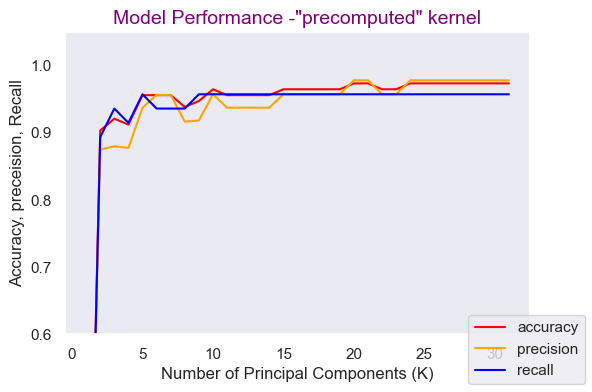

In [144]:
xaxis = range(1,32)
fig = plt.figure(dpi=100)
plt.ylim([0.6, 1.05])
plt.title('Model Performance -"precomputed" kernel', fontsize = 14, color = 'purple')
plt.xlabel("Number of Principal Components (K)", fontsize = 12)
plt.ylabel("Accuracy, preceision, Recall", fontsize = 12)
plt.plot(xaxis, Accuracy, label="accuracy", color = 'red') 
plt.plot(xaxis, Precision, label="precision", color = 'orange')
plt.plot(xaxis, Recall, label="recall", color = 'blue')
fig.legend(loc = "lower right")
plt.grid()